In [1]:
from skimage import io, filters, img_as_ubyte, exposure
import skimage.io as io
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
original = io.imread("Test_Image.jpg")
grayscale = io.imread("Test_Image.jpg", as_gray=True)

In [3]:
Save_Original = io.imsave("Original.jpg",img_as_ubyte(original))
Save_GrayScale = io.imsave("GrayScale.jpg",img_as_ubyte(grayscale))

In [4]:
Open_Original = Image.open("Original.jpg")
Open_GrayScale = Image.open("GrayScale.jpg")

In [5]:
Brighten_Original_Image = ImageEnhance.Brightness(Open_Original).enhance(1.7).save("Brighten_Original.jpg")
Brighten_Gray_Image = ImageEnhance.Brightness(Open_GrayScale).enhance(1.7).save("Brighten_Gray.jpg")
Darken_Original_Image = ImageEnhance.Brightness(Open_Original).enhance(0.45).save("Darken_Original.jpg")
Darken_Gray_Image = ImageEnhance.Brightness(Open_GrayScale).enhance(0.1).save("Darken_Gray.jpg")

In [6]:
Read_Brighten_Original = io.imread("Brighten_Original.jpg")
Read_Darken_Original = io.imread("Darken_Original.jpg")
Read_Brighten_Gray = io.imread("Brighten_Gray.jpg")
Read_Darken_Gray = io.imread("Darken_Gray.jpg")

In [7]:

Histo_Equalized_RGB = exposure.equalize_hist(original)
Histo_Equalized_RGB_Dark = exposure.equalize_hist(Read_Darken_Original)
Histo_Equalized_RGB_Bright = exposure.equalize_hist(Read_Brighten_Original)
Histo_Equalized_Gray = exposure.equalize_hist(grayscale)
Histo_Equalized_Gray_Dark = exposure.equalize_hist(Read_Darken_Gray)
Histo_Equalized_Gray_Bright = exposure.equalize_hist(Read_Brighten_Gray)

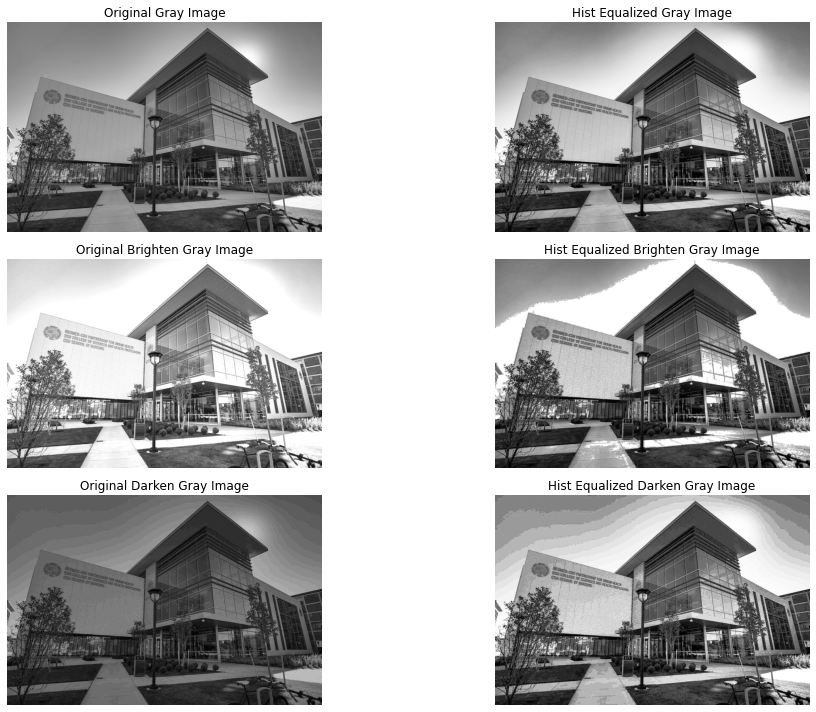

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 10), nrows = 3)

axes[0][0].imshow(grayscale,cmap=plt.cm.gray)
axes[0][0].set_title('Original Gray Image')
axes[0, 0].axis('off')

axes[0][1].imshow(Histo_Equalized_Gray,cmap=plt.cm.gray)
axes[0][1].set_title('Hist Equalized Gray Image')
axes[0, 1].axis('off')

axes[1][0].imshow(Read_Brighten_Gray,cmap=plt.cm.gray)
axes[1][0].set_title('Original Brighten Gray Image')
axes[1, 0].axis('off')

axes[1][1].imshow(Histo_Equalized_Gray_Bright,cmap=plt.cm.gray)
axes[1][1].set_title('Hist Equalized Brighten Gray Image')
axes[1, 1].axis('off')

axes[2][0].imshow(Read_Darken_Gray,cmap=plt.cm.gray)
axes[2][0].set_title('Original Darken Gray Image')
axes[2, 0].axis('off')

axes[2][1].imshow(Histo_Equalized_Gray_Dark,cmap=plt.cm.gray)
axes[2][1].set_title('Hist Equalized Darken Gray Image')
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()
fig.savefig("Gray_Scale_Histogram_EQ_Figure.png",bbox_inches="tight")

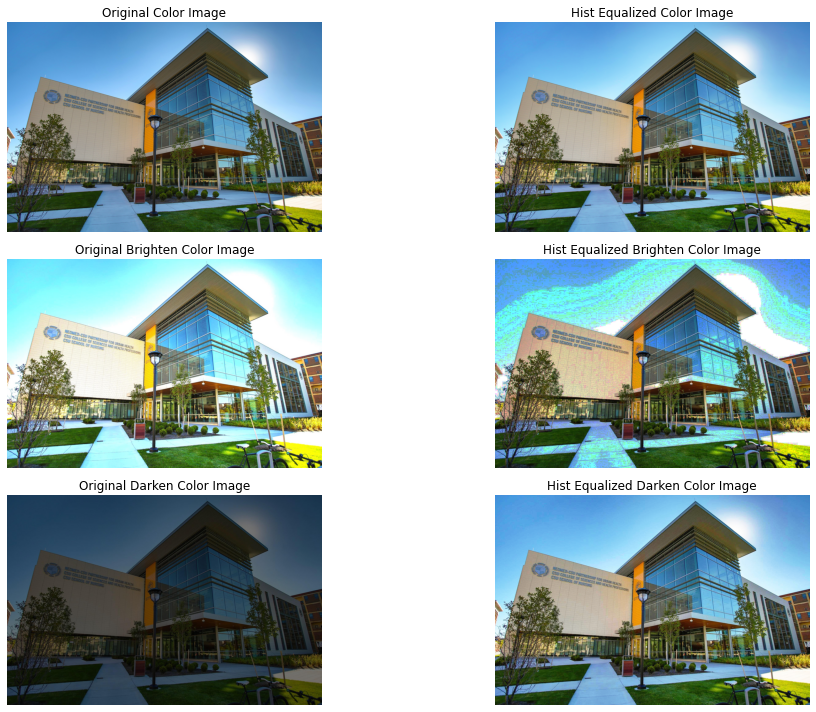

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 10), nrows = 3)

axes[0][0].imshow(original)
axes[0][0].set_title('Original Color Image')
axes[0, 0].axis('off')

axes[0][1].imshow(Histo_Equalized_RGB)
axes[0][1].set_title('Hist Equalized Color Image')
axes[0, 1].axis('off')

axes[1][0].imshow(Read_Brighten_Original)
axes[1][0].set_title('Original Brighten Color Image')
axes[1, 0].axis('off')

axes[1][1].imshow(Histo_Equalized_RGB_Bright)
axes[1][1].set_title('Hist Equalized Brighten Color Image')
axes[1, 1].axis('off')

axes[2][0].imshow(Read_Darken_Original)
axes[2][0].set_title('Original Darken Color Image')
axes[2, 0].axis('off')

axes[2][1].imshow(Histo_Equalized_RGB_Dark)
axes[2][1].set_title('Hist Equalized Darken Color Image')
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()
fig.savefig("Color_Histogram_EQ_Figure.png",bbox_inches="tight")

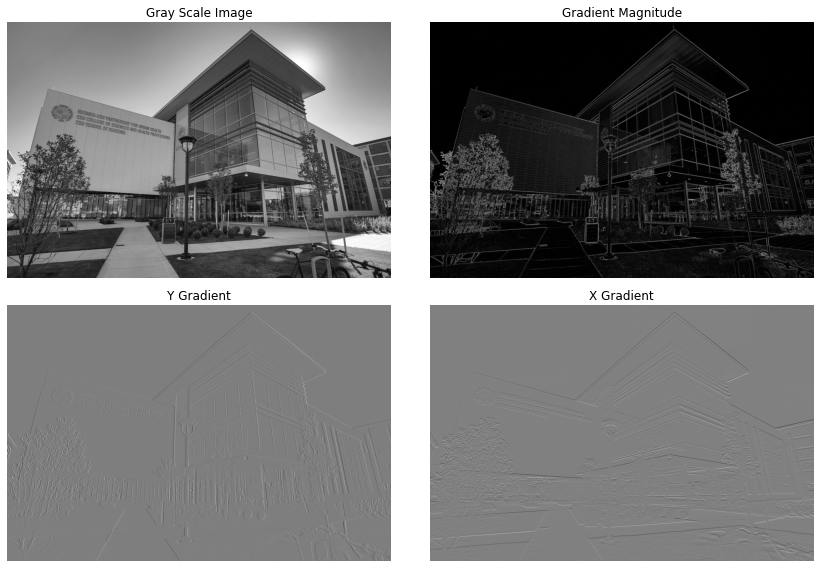

In [10]:
Gradient_X = filters.sobel(grayscale,axis=0)
Gradient_Y = filters.sobel(grayscale,axis=1)
Gradient_Magnitude = np.sqrt(Gradient_X**2.0 + Gradient_Y**2.0)


fig, axes = plt.subplots(ncols=2, figsize=(12, 8), nrows = 2)

axes[0][0].imshow(grayscale,cmap=plt.cm.gray)
axes[0][0].set_title('Gray Scale Image')
axes[0, 0].axis('off')

axes[1][1].imshow(Gradient_X,cmap=plt.cm.gray)
axes[1][1].set_title('X Gradient')
axes[1, 1].axis('off')

axes[1][0].imshow(Gradient_Y,cmap=plt.cm.gray)
axes[1][0].set_title('Y Gradient')
axes[1, 0].axis('off')

axes[0][1].imshow(Gradient_Magnitude,cmap=plt.cm.gray)
axes[0][1].set_title('Gradient Magnitude')
axes[0, 1].axis('off')

plt.tight_layout()
fig.savefig("Gradient_Magnitude_X_Y.png",bbox_inches="tight")
plt.show()

In [11]:
np.mean(Gradient_Magnitude)

0.06600942278320981

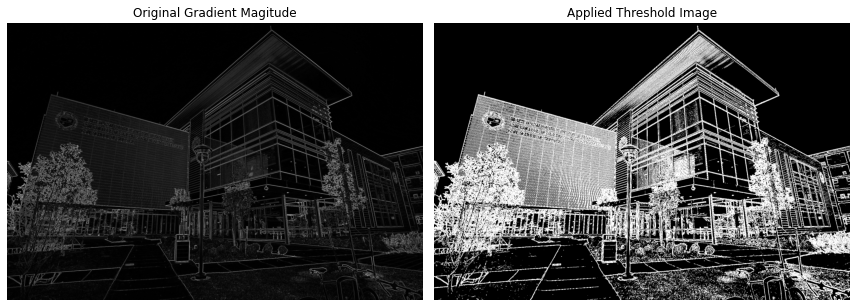

In [12]:
Threashold = Gradient_Magnitude > np.mean(Gradient_Magnitude)

fig, axes = plt.subplots(ncols=2, figsize=(12, 8))

axes[0].imshow(Gradient_Magnitude,cmap=plt.cm.gray)
axes[0].set_title('Original Gradient Magitude')
axes[0].axis('off')

axes[1].imshow(Threashold,cmap=plt.cm.gray)
axes[1].set_title('Applied Threshold Image')
axes[1].axis('off')

plt.tight_layout()
fig.savefig("Threashold_ON_Gradient_mg.png",bbox_inches="tight")
plt.show()

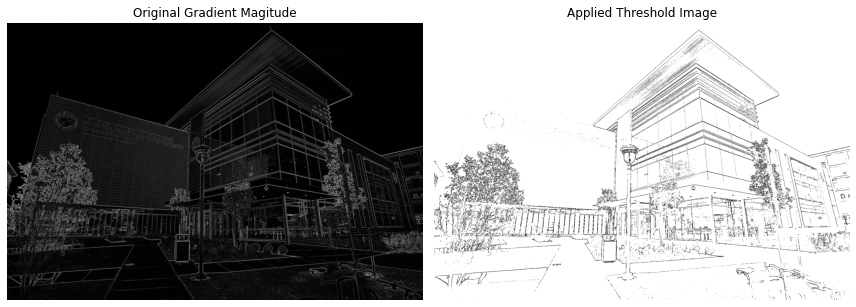

In [13]:
Sketch = grayscale > Gradient_Magnitude

fig, axes = plt.subplots(ncols=2, figsize=(12, 8))

axes[0].imshow(Gradient_Magnitude,cmap=plt.cm.gray)
axes[0].set_title('Original Gradient Magitude')
axes[0].axis('off')

axes[1].imshow(Sketch,cmap=plt.cm.gray)
axes[1].set_title('Applied Threshold Image')
axes[1].axis('off')

plt.tight_layout()
fig.savefig("Sketch_Image_Threshold.png",bbox_inches="tight")
plt.show()